In [21]:
# Compare Univariate version Vs Multiple version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("housing.csv")

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
# number of sample
m = 10
slice = df[["housing_median_age", "median_income","median_house_value"]].head(m).to_numpy()

x = slice[:,0]
x1 = slice[:,0]
x2 = slice[:,1]
y = slice[:,-1]
y = y / 10000
print(f"x1: {x1[:5]}")
print(f"x2: {x2[:5]}")
print(f"y: {y[:5]}")

x1: [41. 21. 52. 52. 52.]
x2: [8.3252 8.3014 7.2574 5.6431 3.8462]
y: [45.26 35.85 35.21 34.13 34.22]


In [27]:
# UNIVARIATE
w = 0
b = 0
cost = 0
dj_dw = 0
dj_db = 0
alpha = 0.0001
epochs = 150
history_cost = []

for j in range(epochs):

    y_hats = x * w + b

    costs = ((y_hats - y) ** 2)
    cost = sum(costs) / (2 * m)
    history_cost.append(cost)

    dj_dws = (y_hats - y) * x
    dj_dbs = (y_hats - y)

    dj_dw = sum(dj_dws) / m
    dj_db = sum(dj_dbs) / m
    
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    
    print(f"cost: {cost}, w: {w}, b: {b}")

cost: 515.5143700000001, w: 0.14517050000000004, b: 0.0031448
cost: 328.7317548503348, w: 0.25720708446600005, b: 0.00560988758
cost: 217.48024422890867, w: 0.34367210594205244, b: 0.00755039743594112
cost: 151.21654460379096, w: 0.4104019158324324, b: 0.00908605694038872
cost: 111.74846978659988, w: 0.46190080000794026, b: 0.010309267368598898
cost: 88.240395977736, w: 0.5016450041228437, b: 0.011291340697824878
cost: 74.23841258555004, w: 0.5323173694077924, b: 0.012087312944460187
cost: 65.89844356095115, w: 0.5559884161265186, b: 0.012739658924337273
cost: 60.930881624545876, w: 0.5742560972676487, b: 0.013281159170972731
cost: 57.97199166108025, w: 0.5883536554120872, b: 0.01373711251984304
cost: 56.20950622132214, w: 0.5992328627797807, b: 0.014127043701262488
cost: 55.15962284121341, w: 0.6076282629006796, b: 0.014466021199082989
cost: 54.53417926034372, w: 0.6141067500233068, b: 0.0147656743265879
cost: 54.16154037039138, w: 0.6191058327171411, b: 0.015034978169046165
cost: 53.

In [28]:
# MULTIPLE
w1 = 0
w2 = 0
b = 0
cost = 0
dj_dw1 = 0
dj_dw2 = 0
dj_db = 0
alpha = 0.0001
epochs = 150
history_cost = []
for j in range(epochs):

    y_hats = x1 * w1 + x2 * w2 + b

    costs = ((y_hats - y) ** 2)
    cost = sum(costs) / (2 * m)
    history_cost.append(cost)

    dj_dws1 = (y_hats - y) * x1
    dj_dws2 = (y_hats - y) * x2
    dj_dbs = (y_hats - y)

    dj_dw1 = sum(dj_dws1) / m
    dj_dw2 = sum(dj_dws2) / m
    dj_db = sum(dj_dbs) / m
    
    w1 = w1 - (alpha * dj_dw1)
    w2 = w2 - (alpha * dj_dw2)
    b = b - (alpha * dj_db)
    
    print(f"cost: {cost}, w1: {w1}, w2: {w2}, b: {b}")

cost: 515.5143700000001, w1: 0.14517050000000004, w2: 0.01691362231, b: 0.0031448
cost: 326.42264471499567, w1: 0.25683020887564834, w2: 0.03054105203595635, b: 0.005601437398984945
cost: 214.40324499473954, w1: 0.34270072327407625, w2: 0.04163902388627072, b: 0.007528453323781432
cost: 148.0302574616563, w1: 0.40872443096810046, w2: 0.05078990626110923, b: 0.009047857904080605
cost: 108.6915695920679, w1: 0.45947447582847156, w2: 0.05844187870388231, b: 0.010253547737872187
cost: 85.36408941382751, w1: 0.4984702587447758, w2: 0.06493985167195572, b: 0.011217783806085664
cost: 71.51935020991667, w1: 0.5284202408838305, w2: 0.07054926177964406, b: 0.011996176747365382
cost: 63.29084355519242, w1: 0.5514088002672148, w2: 0.07547438414581562, b: 0.012631523426775114
cost: 58.38861558593844, w1: 0.5690400328915559, w2: 0.0798724252138268, b: 0.013156759483067548
cost: 55.4564326596961, w1: 0.5825484192218838, w2: 0.08386436830655353, b: 0.01359723155057053
cost: 53.69106035964936, w1: 0.59

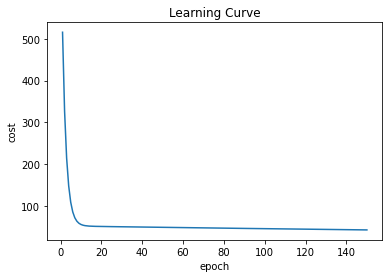

In [29]:
plt.plot(np.arange(epochs)+ 1, history_cost)
plt.title("Learning Curve")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

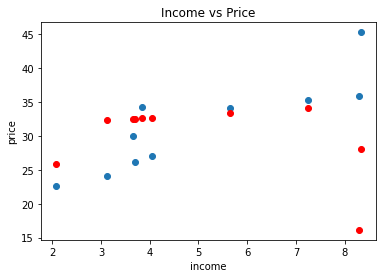

In [30]:
plt.scatter(x2, y)
plt.scatter(x2,y_hats, c = 'red')
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()